In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download('punkt')
nltk.download('stopwords')




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mekde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mekde\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
class FinancialNewsEDA:
   
    def __init__(self, filepath):
        """
        Initialize with the path to the dataset.
        """
        self.filepath = filepath
        self.df = pd.read_csv(filepath, parse_dates=['date'])

        # Convert 'date' to datetime (handle timezone)
        self.df['date'] = pd.to_datetime(self.df['date'], errors='coerce', utc=True)
        self.df = self.df.dropna(subset=['date'])
        print(f"Data loaded successfully with {self.df.shape[0]} rows and {self.df.shape[1]} columns.")

    def descriptive_stats(self):
        """
        Perform basic descriptive statistics:
        - Headline length analysis
        - Number of articles per publisher
        """
        # Headline length
        self.df['headline_length'] = self.df['headline'].apply(lambda x: len(str(x).split()))
        print("Headline length stats:")
        print(self.df['headline_length'].describe())

        # Number of articles per publisher
        publisher_counts = self.df['publisher'].value_counts()
        print("\nTop publishers by number of articles:")
        print(publisher_counts.head(10))

        # Plot headline length distribution
        plt.figure(figsize=(10,6))
        sns.histplot(self.df['headline_length'], bins=30, kde=True)
        plt.title('Distribution of Headline Lengths')
        plt.xlabel('Number of words in headline')
        plt.ylabel('Frequency')
        plt.show()

        # Plot top publishers
        plt.figure(figsize=(10,6))
        sns.barplot(x=publisher_counts.head(10).values, y=publisher_counts.head(10).index)
        plt.title('Top 10 Publishers by Number of Articles')
        plt.xlabel('Number of Articles')
        plt.ylabel('Publisher')
        plt.show()

    def time_analysis(self):
        
        self.df['date_only'] = self.df['date'].dt.date
        self.df['hour'] = self.df['date'].dt.hour

        # Articles per day
        articles_per_day = self.df.groupby('date_only').size()
        plt.figure(figsize=(12,6))
        articles_per_day.plot()
        plt.title('Number of Articles Published Over Time')
        plt.xlabel('Date')
        plt.ylabel('Number of Articles')
        plt.show()

        # Articles by hour
        articles_by_hour = self.df['hour'].value_counts().sort_index()
        plt.figure(figsize=(10,6))
        sns.barplot(x=articles_by_hour.index, y=articles_by_hour.values)
        plt.title('Articles Published by Hour of Day')
        plt.xlabel('Hour (24h)')
        plt.ylabel('Number of Articles')
        plt.show()
    
    def text_analysis(self, top_n=20):
        """
        Perform simple text analysis to find most common words.
        """
        # Combine all headlines
        all_text = ' '.join(self.df['headline'].astype(str).tolist())
        tokens = word_tokenize(all_text.lower())
        stop_words = set(stopwords.words('english'))
        tokens = [t for t in tokens if t.isalpha() and t not in stop_words]

        word_freq = Counter(tokens)
        most_common = word_freq.most_common(top_n)
        print(f"Top {top_n} most common words in headlines:")
        for word, freq in most_common:
            print(f"{word}: {freq}")

    # Generate wordcloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        plt.figure(figsize=(15,7))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('WordCloud of Headlines')
        plt.show()
    def publisher_analysis(self):
        """
        Analyze publishers in detail:
        - Unique publisher domains if emails
        - Count of articles per publisher
        """
        # If publishers have emails, extract domains
        if self.df['publisher'].str.contains('@').any():
            self.df['publisher_domain'] = self.df['publisher'].str.split('@').str[-1]
            domain_counts = self.df['publisher_domain'].value_counts()
            print("Top domains contributing to news feed:")
            print(domain_counts.head(10))
        else:
            domain_counts = self.df['publisher'].value_counts()
            print("Top publishers by article count:")
            print(domain_counts.head(10))

        # Plot
        plt.figure(figsize=(10,6))
        sns.barplot(y=domain_counts.head(10).index, x=domain_counts.head(10).values)
        plt.title('Top 10 Publishers / Domains by Article Count')
        plt.xlabel('Number of Articles')
        plt.ylabel('Publisher / Domain')
        plt.show()
    
    


Data loaded successfully with 1142 rows and 6 columns.
Headline length stats:
count    1142.000000
mean       14.037653
std         9.692981
min         3.000000
25%         7.000000
50%        11.000000
75%        16.000000
max        68.000000
Name: headline_length, dtype: float64

Top publishers by number of articles:
publisher
Benzinga Newsdesk          329
Lisa Levin                 232
Paul Quintaro              118
Benzinga Newsdesk           94
Vick Meyer                  48
ETF Professor               41
Benzinga Insights           41
Hal Lindon                  37
vishwanath@benzinga.com     34
Charles Gross               33
Name: count, dtype: int64


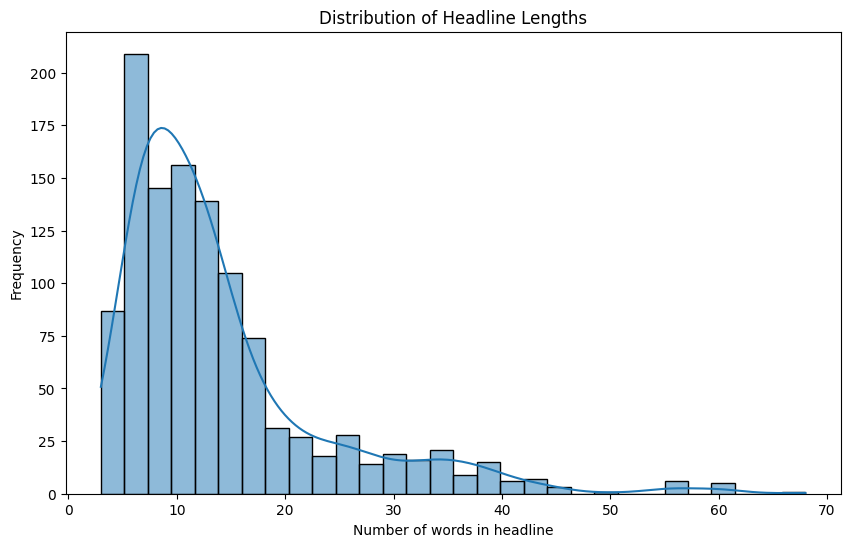

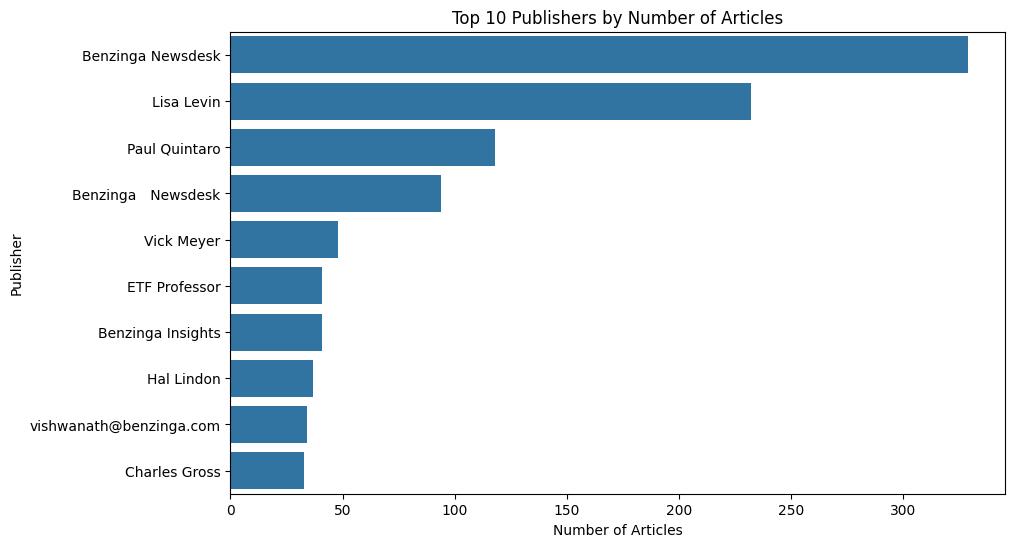

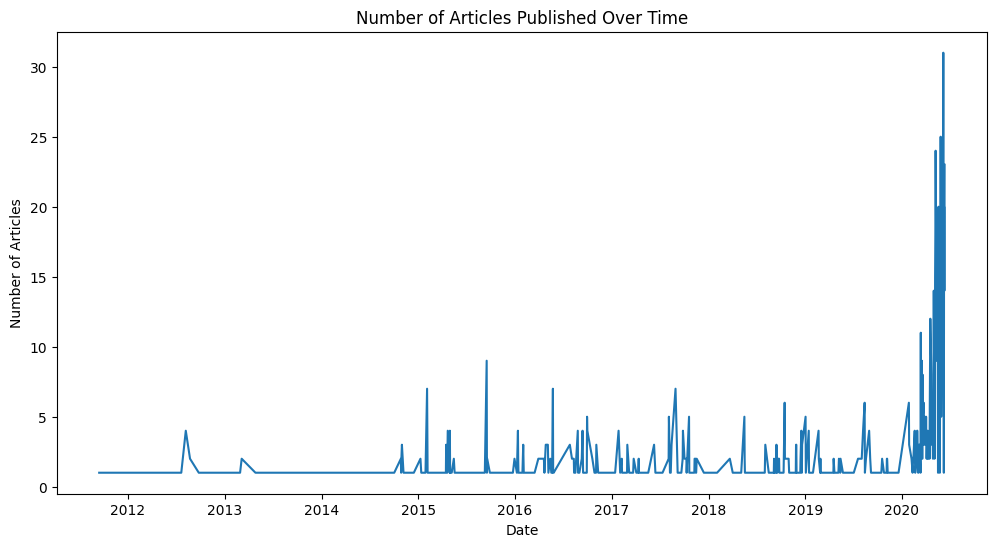

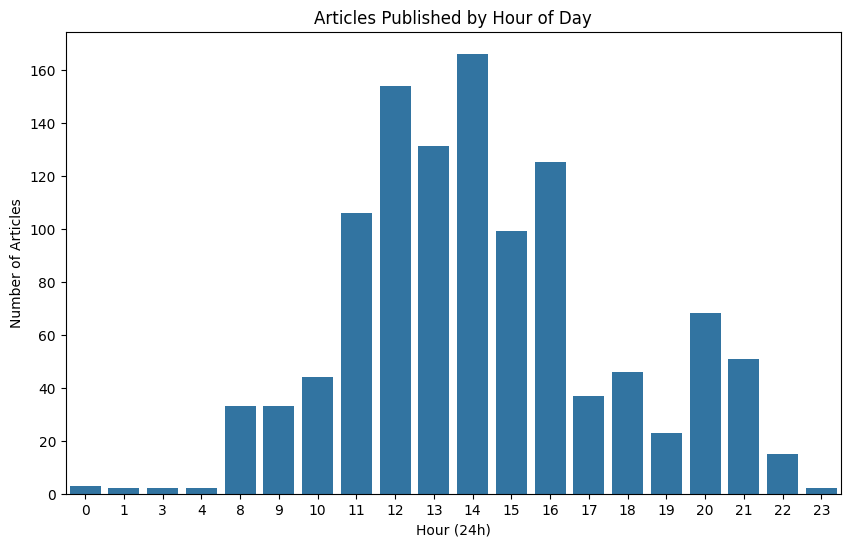

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\mekde/nltk_data'
    - 'c:\\Users\\mekde\\Desktop\\week_1\\.venv\\nltk_data'
    - 'c:\\Users\\mekde\\Desktop\\week_1\\.venv\\share\\nltk_data'
    - 'c:\\Users\\mekde\\Desktop\\week_1\\.venv\\lib\\nltk_data'
    - 'C:\\Users\\mekde\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:/Users/mekde/nltk_data'
**********************************************************************


In [19]:
# Create instance of the EDA class with your CSV file path
eda = FinancialNewsEDA('../data/raw/raw_analyst_ratings.csv')

# Call the methods to perform analyses
eda.descriptive_stats()
eda.time_analysis()
eda.text_analysis(top_n=20)
eda.publisher_analysis()